# Fashion-MNIST

In [31]:
# Used for installing packages into jupyter kernel
import sys
!{sys.executable} -m pip install --upgrade filelock

In [1]:
import os
import random
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.datasets import FashionMNIST, MNIST
from torchvision import transforms
import torchvision.transforms.functional as TF

In [2]:
# Get the dataset from torchvision, do not apply any transformations
mnist_train = FashionMNIST("./data", train=True, download=True, transform=None)
mnist_test = FashionMNIST("./data", train=False, download=True, transform=None)

/Users/akaver/Development/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [21]:
mnist_train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [22]:
mnist_test

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

In [6]:
print(f"Train len: {len(mnist_train)}  Test len: {len(mnist_test)}")

Train len: 60000  Test len: 10000


54000

In [24]:
# convert random image to tensor
image, label = mnist_train[random.randint(0, len(mnist_train))]
# to_tensor converts bytes to [0,1] range (divide by 255)
image_tensor = TF.to_tensor(image)
image_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1176, 0.5922, 0.7725, 0.8980, 0.9137, 0.8471,
          0.6941, 0.2275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.2431, 0.8941, 0.9059, 0.8706, 0.7608, 0.7686, 0.8000,
          0.8745, 0.8784, 0.5373, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0000,
          0.0000, 0.8235, 0.7922, 0.7725, 0.9255, 0.9137, 0.9294, 0.9373,
          0.8431, 0.7216, 0.9333, 0.1961, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.2706, 0.9176, 0.8039, 0.8000, 0.9333, 0.8314, 0.7176, 0.9059,
          0.8078, 0.7882, 0.9020, 0.6706, 0.0000, 0.0000,

In [25]:
# image is 1x28x28 - grayscale
image_tensor.shape

torch.Size([1, 28, 28])

In [26]:
# Calculate mean and standard deviation needed for data normalization

mean_train = 0
mean_test = 0

for img, _ in mnist_train:
    img_tensor = TF.to_tensor(img)
    mean_train += torch.mean(img_tensor)

for img, _ in mnist_test:
    img_tensor = TF.to_tensor(img)
    mean_test += torch.mean(img_tensor)

mean = (mean_train + mean_test) / (len(mnist_train) + len(mnist_test))
mean_train = mean_train / len(mnist_train)
mean_test = mean_test / len(mnist_test)

print(f"Mean for train: {mean_train}")
print(f"Mean for test: {mean_test}")
print(f"Mean over full data: {mean}")

Mean for train: 0.28604063391685486
Mean for test: 0.2868484556674957
Mean over full data: 0.28615602850914


In [27]:
std_train = 0
std_test = 0

for img, _ in mnist_train:
    img_tensor = TF.to_tensor(img)
    img_tensor = torch.square(img_tensor - mean_train)
    std_train += torch.mean(img_tensor)

for img, _ in mnist_test:
    img_tensor = TF.to_tensor(img)
    img_tensor = torch.square(img_tensor - mean_train)
    std_test += torch.mean(img_tensor)

std = torch.sqrt((std_train + std_test) / (len(mnist_train) + len(mnist_test)))
std_train = torch.sqrt(std_train / len(mnist_train))
std_test = torch.sqrt(std_test / len(mnist_test))

print(f"Std for train: {std_train}")
print(f"Std for test: {std_test}")
print(f"Std over full data: {std}")

Std for train: 0.35302430391311646
Std for test: 0.35244521498680115
Std over full data: 0.352941632270813


Black pixel value: -0.810257613658905
Mean for train: 0.28604063391685486
Std for train: 0.35302430391311646


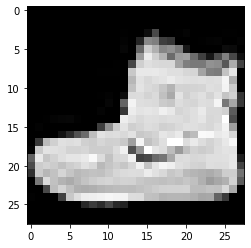

In [28]:
# normalize data for faster training
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean_train,), (std_train,))
])
# apply transformations to data
mnist = FashionMNIST("./data", train=True, download=True, transform=transform)

image, label = mnist[0]

image_show = np.transpose(image.numpy(), (1, 2, 0))
plt.imshow(image_show, cmap='gray')

black_pixel = image[0, 0, 0].item()
print(f"Black pixel value: {black_pixel}")
print(f"Mean for train: {mean_train}")
print(f"Std for train: {std_train}")

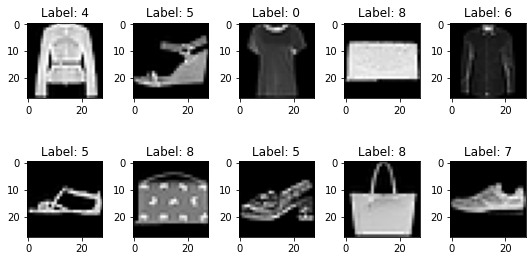

In [17]:
num_row = 2
num_col = 5
num = 10
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num):
    image, label = mnist[random.randint(0, len(mnist_train))]
    image_show = np.transpose(image.numpy(), (1, 2, 0))
    ax = axes[i // num_col, i % num_col]
    ax.imshow(image_show, cmap='gray') # cmap='gray_r' for white bgr
    ax.set_title('Label: {}'.format(label))
plt.tight_layout()
# plt.show()

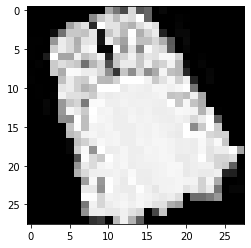

Image rotated: 22


In [29]:
image, label = mnist[random.randint(0, len(mnist_train))]
angle = random.randint(-30, 30)
image = TF.rotate(image, angle, fill=black_pixel)
image_show = np.transpose(image.numpy(), (1, 2, 0))
plt.imshow(image_show, cmap='gray')
plt.show()
print(f"Image rotated: {angle}")